In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hospitals = pd.read_csv("../input/usa-hospitals/Hospitals.csv")
hospital_ratings = pd.read_csv("../input/hospital-ratings/Hospital General Information.csv", encoding="ISO-8859-1")
public_schools = pd.read_csv("../input/usa-public-schools/Public_Schools.csv")
county_time_series = pd.read_csv("../input/zecon/County_time_series.csv")
crosswalk = pd.read_csv("../input/zecon/CountyCrossWalk_Zillow.csv")
unemployment = pd.read_csv("../input/2018-unemployment-rate-by-county/GeoFRED_Unemployment_Rate_by_County_Percent.csv")

In [3]:
unemployment.shape

(3136, 22)

In [4]:
unemployment.head()

,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,SCABBE1URN,"Abbeville County, SC",45001,3.8,6.6,7.7,9.1,8.2,7.7,8.8,8.1,8.1,14.2,13.6,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2
1,LAACAD0URN,"Acadia Parish, LA",22001,5.8,6.0,6.3,6.8,5.8,6.1,3.6,3.8,4.2,6.5,7.3,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4
2,VAACCO1URN,"Accomack County, VA",51001,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,7.9,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1
3,IDADAC1URN,"Ada County, ID",16001,3.4,3.9,4.7,4.9,4.1,3.3,2.7,2.7,4.9,8.9,8.3,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4
4,OKADAI1URN,"Adair County, OK",40001,3.5,4.1,4.8,7.8,6.2,4.8,4.4,4.7,4.9,8.0,10.5,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4


In [5]:
# Unemployment rate in Fairfax, VA in 2018
fairfax_unemployment = unemployment.loc[unemployment['Region Code'] == 51059].sort_values(by=['Region Name'])
print ("The unemployment rate in 2018 for Fairfax, VA is {0}".format(fairfax_unemployment.iloc[:,-1].values[0]))

fairfax_unemployment

The unemployment rate in 2018 for Fairfax, VA is 2.5


,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
896,VAFAIR5URN,"Fairfax County, VA",51059,1.7,2.5,3.4,3.1,2.8,2.6,2.2,2.2,2.8,4.8,5.1,4.8,4.5,4.4,4.2,3.6,3.3,3.0,2.5


In [6]:
hospitals.shape

(7570, 34)

In [7]:
hospitals.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,(281) 420-8765,GENERAL ACUTE CARE,OPEN,182,HARRIS,48201,USA,29.747620,-94.945477,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.dshs.texas.gov/facilities/find-a-li...,2017-12-14T00:00:00.000Z,IMAGERY,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,(614) 471-2552,SPECIAL,OPEN,50,FRANKLIN,39049,USA,40.027143,-82.881843,622210,"HOSPITALS, SUBSTANCE ABUSE",http://publicapps.odh.ohio.gov/EID/Default.aspx,2018-03-15T00:00:00.000Z,IMAGERY WITH OTHER,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,(937) 641-3300,CHILDREN,OPEN,155,MONTGOMERY,39113,USA,39.774242,-84.168027,622310,"CHILDREN'S HOSPITALS, SPECIALTY (EXCEPT PSYCHI...",http://publicapps.odh.ohio.gov/EID/Default.aspx,2018-03-15T00:00:00.000Z,IMAGERY WITH OTHER,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,(330) 726-5021,LONG TERM CARE,OPEN,45,MAHONING,39099,USA,41.005169,-80.632972,622310,"EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTA...",http://publicapps.odh.ohio.gov/EID/Default.aspx,2018-03-15T00:00:00.000Z,IMAGERY WITH OTHER,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,(615) 393-8879,PSYCHIATRIC,OPEN,32,MONTGOMERY,39113,USA,39.747740,-84.199398,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://publicapps.odh.ohio.gov/EID/Default.aspx,2018-03-15T00:00:00.000Z,IMAGERY WITH OTHER,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [8]:
hospital_ratings.shape

(4812, 28)

In [9]:
hospital_ratings.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [10]:
hospital_ratings = hospital_ratings[['Hospital Name', 'Hospital overall rating']]
hospital_ratings.dropna()
hospital_ratings.head()

,Hospital Name,Hospital overall rating
0,SOUTHEAST ALABAMA MEDICAL CENTER,3
1,MARSHALL MEDICAL CENTER SOUTH,3
2,ELIZA COFFEE MEMORIAL HOSPITAL,2
3,MIZELL MEMORIAL HOSPITAL,2
4,CRENSHAW COMMUNITY HOSPITAL,3


In [11]:
hospitals_with_ratings = pd.merge(hospitals, hospital_ratings, how='left', left_on='NAME', right_on='Hospital Name')

hospitals_with_ratings = hospitals_with_ratings.loc[hospitals_with_ratings['COUNTYFIPS'] != 'NOT AVAILABLE']

hospitals_with_ratings = hospitals_with_ratings.loc[~pd.isna(hospitals_with_ratings)['Hospital overall rating']]
hospitals_with_ratings = hospitals_with_ratings.loc[hospitals_with_ratings['Hospital overall rating'] != 'Not Available']
hospitals_with_ratings['Hospital overall rating'] = hospitals_with_ratings['Hospital overall rating'].astype("int64")

hospitals_with_ratings.rename(index=str, columns={"COUNTYFIPS": "FIPS", "Hospital overall rating": "AverageHospitalRating"}, inplace=True)

hospitals_with_ratings.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,FIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,Hospital Name,AverageHospitalRating
7,-101.294085,48.232226,8504,5258701,TRINITY HOSPITALS,1 W BURDICK EXPY,MINOT,ND,58701,NOT AVAILABLE,(701) 857-5000,GENERAL ACUTE CARE,OPEN,251,WARD,38101,USA,48.232226,-101.294085,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.ndhealth.gov/hf/North_Dakota_Hospit...,2017-09-11T00:00:00.000Z,IMAGERY,2017-10-02T00:00:00.000Z,http://www.trinityhealth.org,5055A,NOT AVAILABLE,38.0,NON-PROFIT,-999.0,251.0,LEVEL II,Y,TRINITY HOSPITALS,1
41,-78.855473,38.404787,8528,147322801,SENTARA RMH MEDICAL CENTER,2010 HEALTH CAMPUS DRIVE,HARRISONBURG,VA,22801,NOT AVAILABLE,(540) 689-1000,GENERAL ACUTE CARE,OPEN,238,ROCKINGHAM,51165,USA,38.404787,-78.855473,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY WITH OTHER,2018-01-26T00:00:00.000Z,www.rmhonline.com,NOT AVAILABLE,ROCKINGHAM MEMORIAL HOSPITAL,51.0,NON-PROFIT,-999.0,238.0,NOT AVAILABLE,NOT AVAILABLE,SENTARA RMH MEDICAL CENTER,3
42,-81.912121,36.722913,8529,148224211,JOHNSTON MEMORIAL HOSPITAL,16000 JOHNSTON MEMORIAL DRIVE,ABINGDON,VA,24211,NOT AVAILABLE,(276) 258-1000,GENERAL ACUTE CARE,OPEN,116,WASHINGTON,51191,USA,36.722913,-81.912121,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY WITH OTHER,2018-01-26T00:00:00.000Z,www.jmh.org,NOT AVAILABLE,NOT AVAILABLE,51.0,NON-PROFIT,-999.0,116.0,NOT AVAILABLE,Y,JOHNSTON MEMORIAL HOSPITAL,3
45,-97.593716,33.217107,8532,15576234,WISE REGIONAL HEALTH SYSTEM,609 MEDICAL CENTER DR,DECATUR,TX,76234,NOT AVAILABLE,(940) 627-5921,GENERAL ACUTE CARE,OPEN,99,WISE,48497,USA,33.217107,-97.593716,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.dshs.texas.gov/facilities/find-a-li...,2017-12-14T00:00:00.000Z,IMAGERY,2017-12-18T00:00:00.000Z,http://www.wiseregional.com,NOT AVAILABLE,NOT AVAILABLE,48.0,GOVERNMENT - DISTRICT/AUTHORITY,-999.0,99.0,LEVEL IV,Y,WISE REGIONAL HEALTH SYSTEM,3
47,-95.862393,40.679974,8534,105168410,CHI HEALTH ST MARY'S,1301 GRUNDMAN BLVD,NEBRASKA CITY,NE,68410,NOT AVAILABLE,(402) 873-3321,CRITICAL ACCESS,OPEN,18,OTOE,31131,USA,40.679974,-95.862393,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://dhhs.ne.gov/publichealth/Documents/Hosp...,2017-11-08T00:00:00.000Z,IMAGERY WITH OTHER,2017-11-29T00:00:00.000Z,http://chihealthstmarys.com/,NOT AVAILABLE,NOT AVAILABLE,31.0,NON-PROFIT,-999.0,18.0,LEVEL IV,Y,CHI HEALTH ST MARY'S,3


In [12]:
# Hospitals in Fairfax, VA
fairfax_hospitals = hospitals_with_ratings.loc[hospitals_with_ratings['FIPS'] == "51059"].sort_values(by=['NAME'])
print ("There are {0} hospitals in Fairfax, VA".format(fairfax_hospitals.shape[0]))

fairfax_hospitals

There are 4 hospitals in Fairfax, VA


,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,FIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,Hospital Name,AverageHospitalRating
5479,-77.379849,38.884589,13033,3022033,INOVA FAIR OAKS HOSPITAL,3600 JOSEPH SIEWICK DRIVE,FAIRFAX,VA,22033,NOT AVAILABLE,(703) 391-3600,GENERAL ACUTE CARE,OPEN,182,FAIRFAX,51059,USA,38.884589,-77.379849,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY,2018-01-26T00:00:00.000Z,http://www.inova.org/patient-and-visitor-infor...,NOT AVAILABLE,NOT AVAILABLE,51.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y,INOVA FAIR OAKS HOSPITAL,4
5485,-77.227680,38.858199,13038,3122042,INOVA FAIRFAX HOSPITAL,3300 GALLOWS ROAD,FALLS CHURCH,VA,22042,NOT AVAILABLE,(703) 776-4000,GENERAL ACUTE CARE,OPEN,833,FAIRFAX,51059,USA,38.858199,-77.227680,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY,2018-01-26T00:00:00.000Z,http://www.inova.org/patient-and-visitor-infor...,NOT AVAILABLE,NOT AVAILABLE,51.0,NON-PROFIT,-999.0,833.0,I,Y,INOVA FAIRFAX HOSPITAL,3
5489,-77.077046,38.739730,13042,3222306,INOVA MOUNT VERNON HOSPITAL,2501 PARKERS LANE,ALEXANDRIA,VA,22306,NOT AVAILABLE,(703) 664-7000,GENERAL ACUTE CARE,OPEN,237,FAIRFAX,51059,USA,38.739730,-77.077046,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY,2018-01-26T00:00:00.000Z,http://www.inova.org/patient-and-visitor-infor...,NOT AVAILABLE,NOT AVAILABLE,51.0,NON-PROFIT,-999.0,237.0,NOT AVAILABLE,Y,INOVA MOUNT VERNON HOSPITAL,3
5490,-77.364166,38.962224,13043,3620190,RESTON HOSPITAL CENTER,1850 TOWN CENTER PARKWAY,RESTON,VA,20190,NOT AVAILABLE,(703) 689-9020,GENERAL ACUTE CARE,OPEN,187,FAIRFAX,51059,USA,38.962224,-77.364166,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.vhi.org,2017-11-13T00:00:00.000Z,IMAGERY,2018-01-26T00:00:00.000Z,www.restonhospital.com,NOT AVAILABLE,NOT AVAILABLE,51.0,PROPRIETARY,-999.0,187.0,II,Y,RESTON HOSPITAL CENTER,2


In [13]:
public_schools.shape

(102370, 33)

In [14]:
public_schools.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,(386) 423-6650,1,1,235,VOLUSIA,12127,USA,29.022271,-81.050895,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2014-02-04T00:00:00.000Z,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,(318) 473-4066,1,1,333,RAPIDES,22079,USA,31.180659,-92.507288,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2015-05-08T00:00:00.000Z,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,(207) 319-1960,1,1,791,CUMBERLAND,23005,USA,43.908147,-69.971880,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2014-02-04T00:00:00.000Z,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,(601) 267-9148,1,1,1222,LEAKE,28079,USA,32.728496,-89.542799,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,(816) 628-4113,1,1,296,CLAY,29047,USA,39.364359,-94.361775,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE


In [15]:
# Public schools for Fairfax, VA
# fairfax_schools = public_schools.loc[(public_schools['COUNTYFIPS'] == 51059) & (public_schools['CITY'] == 'FAIRFAX')].sort_values(by=['NAME'])
fairfax_schools = public_schools.loc[public_schools['COUNTYFIPS'] == 51059].sort_values(by=['NAME'])
print ("There are {0} public schools in Fairfax, VA".format(fairfax_schools.shape[0]))

fairfax_schools

There are 221 public schools in Fairfax, VA


,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
32864,-77.079448,38.763751,46981,510126002674,"ACHIEVEMENT, INTEGRITY AND MATURITY","C/O KATHRYN SALERNO, 2709 POPKINS LANE",ALEXANDRIA,VA,22306,NOT AVAILABLE,(703) 660-2064,4,1,-999,FAIRFAX,51059,USA,38.763751,-77.079448,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010-01-29T00:00:00.000Z,IMAGERY/OTHER,2010-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,N,-1,N,N,5101260,-1,NOT AVAILABLE
71215,-77.102203,38.774503,67378,510126001103,ALC AT BRYANT,2709 POPKINS LN,ALEXANDRIA,VA,22306,NOT AVAILABLE,(703) 660-2101,4,1,-999,FAIRFAX,51059,USA,38.774503,-77.102203,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010-01-29T00:00:00.000Z,IMAGERY/OTHER,2017-10-31T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,N,-1,N,N,5101260,-1,NOT AVAILABLE
53391,-77.278435,38.783956,45506,510126002862,ALC AT BURKE,"BURKE SCHOOL, 9645 BURKE LAKE ROAD",BURKE,VA,20115,NOT AVAILABLE,(703) 426-7300,4,1,-999,FAIRFAX,51059,USA,38.783956,-77.278435,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2014-02-04T00:00:00.000Z,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,N,-1,N,N,5101260,-1,NOT AVAILABLE
96262,-77.091162,38.800327,96106,510126002826,ALC AT CAMERON,3434 CAMPBELL DR,ALEXANDRIA,VA,22303,NOT AVAILABLE,(703) 329-2100,4,1,-999,FAIRFAX,51059,USA,38.800327,-77.091162,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2011-09-30T00:00:00.000Z,IMAGERY,2011-09-30T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,N,-1,N,N,5101260,-1,NOT AVAILABLE
93385,-77.162998,38.815037,89589,510126002790,ALC AT MONTROSE,6525 MONTROSE ST,ALEXANDRIA,VA,22312,NOT AVAILABLE,(703) 658-5800,4,1,-999,FAIRFAX,51059,USA,38.815037,-77.162998,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010-01-29T00:00:00.000Z,IMAGERY/OTHER,2010-05-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,N,-1,N,N,5101260,-1,NOT AVAILABLE
19557,-77.337847,38.980100,29627,510126000767,ALDRIN ELEM,11375 CENTER HARBOR RD,RESTON,VA,20194,2061,(703) 904-3800,1,1,786,FAIRFAX,51059,USA,38.980100,-77.337847,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,PK,06,5101260,47,NOT AVAILABLE
27521,-77.207810,38.821763,28591,510126000423,ANNANDALE HIGH,4700 MEDFORD DR,ANNANDALE,VA,22003,NOT AVAILABLE,(703) 642-4100,1,1,2385,FAIRFAX,51059,USA,38.821763,-77.207810,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-05-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,2219,09,12,5101260,166,NOT AVAILABLE
47823,-77.208145,38.827289,4828,510126000424,ANNANDALE TERRACE ELEM,7604 HERALD ST,ANNANDALE,VA,22003,NOT AVAILABLE,(703) 658-5600,1,1,772,FAIRFAX,51059,USA,38.827289,-77.208145,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-05-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,715,PK,05,5101260,57,NOT AVAILABLE
101465,-77.358506,38.980085,101316,510126002058,ARMSTRONG ELEM,11900 LAKE NEWPORT RD,RESTON,VA,20194,1500,(703) 375-4800,1,1,513,FAIRFAX,51059,USA,38.980085,-77.358506,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,470,

In [16]:
# 2018 unemployment per county
unemployment_per_county = unemployment.loc[:,("Region Code", "2018")]
unemployment_per_county.rename(index=str, columns={"Region Code": "FIPS", "2018": "UnemploymentRate"}, inplace=True)
unemployment_per_county["FIPS"] = unemployment_per_county["FIPS"].astype("int64")

print ("The unemployment rate for Fairfax, VA is {0}".format(unemployment_per_county.loc[unemployment_per_county['FIPS']==51059]["UnemploymentRate"][0]))
unemployment_per_county.head()

The unemployment rate for Fairfax, VA is 2.5


,FIPS,UnemploymentRate
0,45001,4.2
1,22001,5.4
2,51001,4.1
3,16001,2.4
4,40001,4.4


In [17]:
# Number of Public schools per county
public_schools_per_county = public_schools['COUNTYFIPS'].value_counts().to_frame()
public_schools_per_county.reset_index(level=0, inplace=True)
public_schools_per_county.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfSchools"}, inplace=True)
public_schools_per_county["FIPS"] = public_schools_per_county["FIPS"].astype("int64")

print ("There are {0} public schools in Fairfax, VA".format(public_schools_per_county.loc[public_schools_per_county['FIPS']==51059]["NumberOfSchools"][0]))
public_schools_per_county.head()

There are 221 public schools in Fairfax, VA


,FIPS,NumberOfSchools
0,6037,2277
1,17031,1326
2,4013,1246
3,48201,1125
4,6073,763


In [18]:
# Compute average hospital rating per county
average_hospital_rating_per_county = hospitals_with_ratings[['FIPS', 'AverageHospitalRating']]

average_hospital_rating_per_county = average_hospital_rating_per_county.dropna()

average_hospital_rating_per_county = average_hospital_rating_per_county.groupby(['FIPS']).mean()
average_hospital_rating_per_county.reset_index(level=0, inplace=True)
average_hospital_rating_per_county["FIPS"] = average_hospital_rating_per_county["FIPS"].astype("int64")

average_hospital_rating_per_county.head()

,FIPS,AverageHospitalRating
0,10005,3.5
1,1001,4.0
2,1003,3.0
3,1005,3.0
4,1011,3.0


In [19]:
# Number of Hospitals per county
hospitals_per_county = hospitals['COUNTYFIPS'].value_counts().to_frame()
hospitals_per_county.reset_index(level=0, inplace=True)
hospitals_per_county.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfHospitals"}, inplace=True)
hospitals_per_county.dropna(inplace=True)
hospitals_per_county= hospitals_per_county[hospitals_per_county["FIPS"] != "NOT AVAILABLE"]
hospitals_per_county["FIPS"] = hospitals_per_county["FIPS"].astype("int64")

print ("There are {0} hospitals in Fairfax, VA".format(hospitals_per_county.loc[hospitals_per_county['FIPS']==51059]["NumberOfHospitals"][0]))
hospitals_per_county.head()

There are 8 hospitals in Fairfax, VA


,FIPS,NumberOfHospitals
0,6037,131
1,48201,93
2,4013,73
3,17031,73
4,48113,58


In [20]:
hospitals_per_county = hospitals_per_county.merge(average_hospital_rating_per_county, on="FIPS", how="left")
hospitals_per_county.head()

,FIPS,NumberOfHospitals,AverageHospitalRating
0,6037,131,2.775000
1,48201,93,3.357143
2,4013,73,3.047619
3,17031,73,2.695652
4,48113,58,3.222222


In [21]:
county_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,...,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69200.0,88700.0,125900.0,135600.0,85700.0,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96700.0,93000.0,106300.0,167400.0,NaN,116800.0,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97700.0,103100.0,162400.0,NaN,110600.0,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,N

In [22]:
# Average price for houses in Fairfax, VA
house_prices = county_time_series.groupby("RegionName").mean()
average_price_for_fairfax = house_prices["ZHVI_AllHomes"][51059]
print("The average price for a house in Fairfax, VA is ${:,.2f}".format(average_price_for_fairfax))

The average price for a house in Fairfax, VA is $390,961.69


In [23]:
crosswalk = crosswalk[['FIPS', 'CountyName', 'StateName']]
crosswalk["FIPS"] = crosswalk["FIPS"].astype("int64")
crosswalk.head()

,FIPS,CountyName,StateName
0,42103,Pike,Pennsylvania
1,36005,Bronx,New York
2,34013,Essex,New Jersey
3,36047,Kings,New York
4,34029,Ocean,New Jersey


In [24]:
# Create Team EST dataset
team_est = house_prices["ZHVI_AllHomes"].to_frame()
team_est.reset_index(level=0, inplace=True)
team_est.rename(index=str, columns={"RegionName": "FIPS", "ZHVI_AllHomes": "AverageHousePrice"}, inplace=True)
team_est["FIPS"] = team_est["FIPS"].astype("int64")
team_est.dropna(inplace=True)

team_est.head()

,FIPS,AverageHousePrice
0,1001,114483.665339
1,1003,164861.685824
4,1009,106357.471264
14,1033,92332.051282
20,1049,98315.492958


In [25]:
team_est = team_est.merge(crosswalk, on="FIPS")
team_est = team_est.merge(unemployment_per_county, on="FIPS")
team_est = team_est.merge(public_schools_per_county, on="FIPS")
team_est = team_est.merge(hospitals_per_county, on="FIPS")
team_est = team_est[['FIPS', 'CountyName', 'StateName', 'NumberOfSchools', 'NumberOfHospitals', 'AverageHospitalRating', 'UnemploymentRate', 'AverageHousePrice']]
team_est.head()

,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,AverageHousePrice
0,1001,Autauga,Alabama,15,1,4.0,3.6,114483.665339
1,1003,Baldwin,Alabama,47,4,3.0,3.6,164861.685824
2,1009,Blount,Alabama,20,1,NaN,3.5,106357.471264
3,1033,Colbert,Alabama,27,2,2.5,4.7,92332.051282
4,1049,De Kalb,Alabama,20,1,3.0,3.8,98315.492958


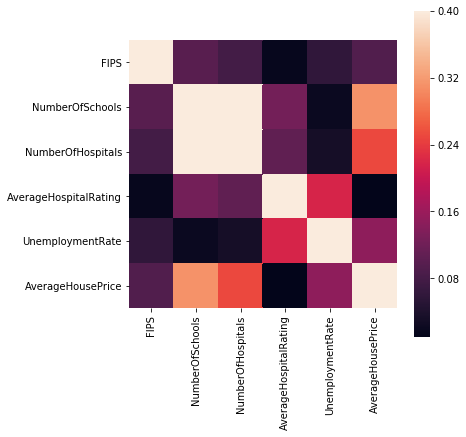

In [26]:
corrmat = team_est.corr()
plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat.abs(), vmax=.4, square=True)

# corrmat = team_est.corr()
# plt.subplots(figsize=(6,1))
# sns.heatmap(corrmat.abs().values[np.newaxis,-1], vmax=.4)

# corrmat = team_est.corr()
# plt.subplots(figsize=(6,1))
# sns.heatmap(corrmat.abs()["AverageHousePrice"][:,np.newaxis], vmax=.4)

In [27]:
print ("The correlation between a house price and the number of hospitals is: {0}".format(corrmat["AverageHousePrice"]["NumberOfHospitals"]))
print ("The correlation between a house price and the average hospital rating is: {0}".format(corrmat["AverageHousePrice"]["AverageHospitalRating"]))
print ("The correlation between a house price and the number of schools is: {0}".format(corrmat["AverageHousePrice"]["NumberOfSchools"]))
print ("The correlation between a house price and the unemployment rate is: {0}".format(corrmat["AverageHousePrice"]["UnemploymentRate"]))

The correlation between a house price and the number of hospitals is: 0.2511991243043908
The correlation between a house price and the average hospital rating is: -0.009594551279128003
The correlation between a house price and the number of schools is: 0.31172070722672596
The correlation between a house price and the unemployment rate is: -0.14913118769936717


In [28]:
team_est.to_csv("team_est.csv")

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

xgboost = XGBRegressor(objective ='reg:linear', 
                       colsample_bytree = 0.3, 
                       learning_rate = 0.1,
                       max_depth = 5, 
                       alpha = 10, 
                       random_state=777,
                       n_estimators = 100)

dataset = team_est.values
dataset = dataset[:, 3:]

x, y = dataset[:,:-1], dataset[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=777)

xgboost.fit(x_train, y_train)

y_prediction = xgboost.predict(x_test)

r2_score(y_test, y_prediction)

0.01778342097154284

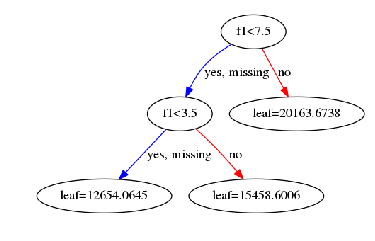

In [30]:
from xgboost import plot_tree
from xgboost import to_graphviz
import matplotlib.pyplot as plt

plot_tree(xgboost)
plt.show()

for i in range(100):
    dot = to_graphviz(xgboost, num_trees=i)
    dot.render("trees{0}".format(i))

In [31]:
print("These are the importance of each feature: {0}".format(xgboost.feature_importances_))

These are the importance of each feature: [0.48461202 0.19816935 0.14491893 0.17229968]


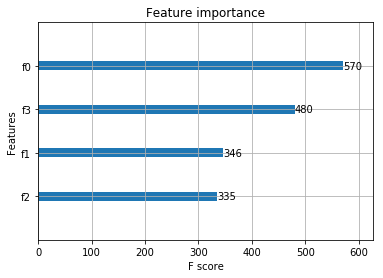

In [32]:
from xgboost import plot_importance
plot_importance(xgboost)
plt.show()

In [33]:
# Generate a few examples
print ("These are the first five entries")
print (x_test[:5])
print ("These are the model prediction for these entries")
print (xgboost.predict(x_test[:5]))
print ("These are the actual prices")
print (y_test[:5])

These are the first five entries
[[16 2 3.5 4.6]
 [35 2 nan 3.8]
 [17 1 3.0 6.0]
 [43 3 3.0 4.5]
 [31 1 nan 2.8]]
These are the model prediction for these entries
[113782.75  132476.36   87493.414  97627.    137766.8  ]
These are the actual prices
[80876.62835249043 80200.0 86789.27203065134 90973.5632183908
 146457.85440613027]
